# **GIS × Python Tutorial Session10 ~ DSMの作成とDCHMの作成 ~**
---
この記事は「GIS × Python Tutorial」の関連記事です。

<br><br><br>



## **はじめに**
---


<br><br><br>

 - DSMの作成
    - 点群データの読み込み
    - DSMの計算
    - 可視化（DSMとDTMを並べる）
 - DCHMの作成
    - DSMからDTMを引く方法
    - PDALで点群データからDTMを引き、DSMを作成する方法
    - 可視化（DCHM - DSM - DTMを並べる）

In [6]:
import json

import japanize_matplotlib
from matplotlib import pyplot as plt
import pdal
import pyproj
import rasterio
japanize_matplotlib.japanize()

IN_FILE_LAS = r'../datasets/01ID7913_proj.las'
IN_FILE_DTM = r'../datasets/01ID7913_DTM_R05_SMOOTH.tif'
OUT_FILE_DSM = r'../datasets/01ID7913_DSM_R05.tif'
OUT_FILE_DCHM = r'../datasets/01ID7913_DCHM_R05.tif'

IN_EPSG = 'EPSG:6669'
proj_crs = pyproj.CRS(IN_EPSG)
IN_SRS = proj_crs.to_wkt(pretty=True)

In [11]:
workflow = {
    'pipeline': [
        {
            'type': 'readers.las',
            'filename': IN_FILE_LAS
        },
        {
            'type': 'writers.gdal',
            'filename': OUT_FILE_DSM,
            'default_srs': IN_SRS,
            'resolution': 0.5,
            'radius': 1.0,
            'window_size': 4,
            'output_type': 'max',
            'gdaldriver': 'GTiff'
        }
    ]
}

pipeline = pdal.Pipeline(json.dumps(workflow))
pipeline.execute()

6684581

In [19]:
with rasterio.open(IN_FILE_DTM, mode='r') as dst:
    dtm = dst.read(1)

with rasterio.open(OUT_FILE_DSM, mode='r') as dst:
    dsm = dst.read(1)

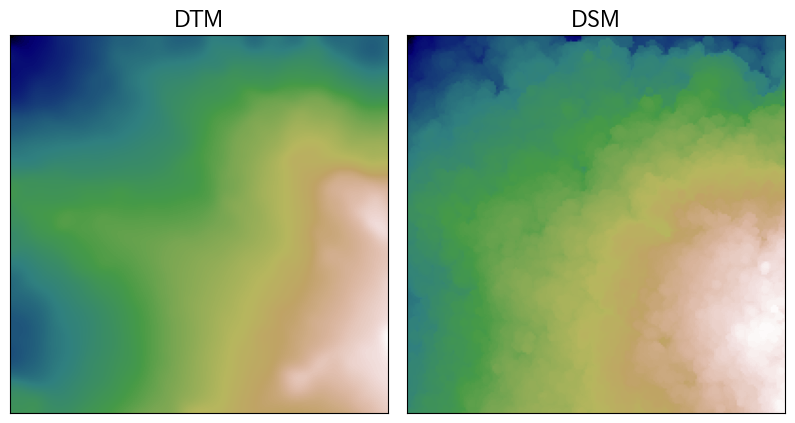

In [25]:
slice_ = slice(0, 200)
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
for _ax, title, img in zip(ax, ['DTM', 'DSM'], [dtm, dsm]):
    _ax.imshow(img[slice_, slice_], cmap='gist_earth')
    _ax.axes.yaxis.set_visible(False)
    _ax.axes.xaxis.set_visible(False)
    _ax.set_title(title, fontsize=16)

plt.subplots_adjust(wspace=0.05)
# plt.savefig(r'../images/session10/dtm_dsm_img.png', dpi=300)
plt.show()